In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def first_polygon_mask(event,x,y,flags,params):    #gets the main overall segment
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(temp_image,(x,y),4,(255,0,0),-1)
        first_mask.append([x,y])                  #get points for first mask
        cv2.imshow("image",temp_image)            # leave "image" name the same for all temp images..
                                                  #this is to because you want to use the same image.
        
def second_polygon_mask(event,x,y,flags,params):    #used to remove inner segments that aren't needed
    if event == cv2.EVENT_LBUTTONDOWN:            # use the left click to get the points of a set
        cv2.circle(temp_image,(x,y),4,(0,255,0),-1)
        second_mask.append([x,y])
        cv2.imshow("image",temp_image)
    if event == cv2.EVENT_RBUTTONDOWN:            # use the right click to complete a set of points
        hold = second_mask.copy()    # second_mask and main_second_black are somehow connected by referencing..so I do this
        main_second_mask.append(hold)
        print(second_mask)
        second_mask.clear()
        print("One mask set done {}".format(main_black))

In [ ]:
#switching second mask and first mask
#hence second mask is done first

In [150]:
cam_name = "camera5"
path = "factory_imgs/" + cam_name +".png"
im = cv2.imread(path)
imm = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
temp_image = im.copy()          #temporary copy of main image used to highlight points for masks


second_mask = []
main_second_mask = []
cv2.imshow("image",temp_image)
cv2.setMouseCallback("image",second_polygon_mask)
cv2.waitKey(0)
cv2.destroyAllWindows
print(main_second_mask)

[[418, 520], [423, 506], [430, 496], [436, 485], [450, 483], [463, 483], [481, 486], [495, 485], [499, 499], [506, 515], [506, 535], [501, 547], [500, 564], [496, 576], [487, 590], [474, 586], [462, 582], [433, 587], [413, 573], [417, 543]]
One mask set done []
[[575, 537], [573, 519], [576, 498], [585, 487], [603, 486], [622, 486], [644, 488], [661, 508], [665, 539], [664, 570], [647, 589], [620, 588], [589, 588], [576, 563]]
One mask set done []
[[729, 542], [717, 525], [709, 496], [710, 475], [719, 462], [744, 455], [768, 457], [790, 461], [809, 470], [822, 480], [826, 506], [826, 520], [826, 548], [813, 557], [792, 555], [774, 556], [751, 555]]
One mask set done []
[[281, 497], [293, 487], [313, 482], [333, 481], [347, 486], [358, 498], [358, 515], [359, 532], [353, 551], [345, 563], [337, 574], [323, 583], [311, 584], [294, 582], [284, 582], [266, 582], [251, 579], [250, 564], [254, 555], [255, 538], [257, 518], [263, 503]]
One mask set done []
[[297, 419], [316, 426], [329, 425],

## when selecting points for full boundary of floor plane, let the points of the floor plane cut be the screen be a bit further from the screen edge

[[247, 66], [833, 65], [834, 656], [248, 657]]


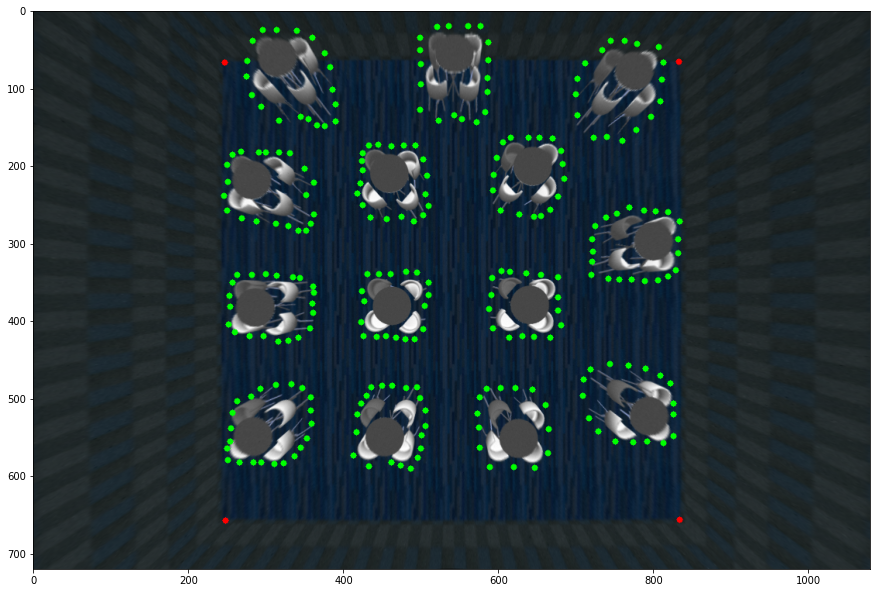

In [151]:
first_mask = []
cv2.imshow("image",temp_image)
cv2.setMouseCallback("image",first_polygon_mask)   #call mouse event
cv2.waitKey(0)
cv2.destroyAllWindows()
print(first_mask)
plt.figure(figsize=(15,15))
plt.imshow(temp_image)

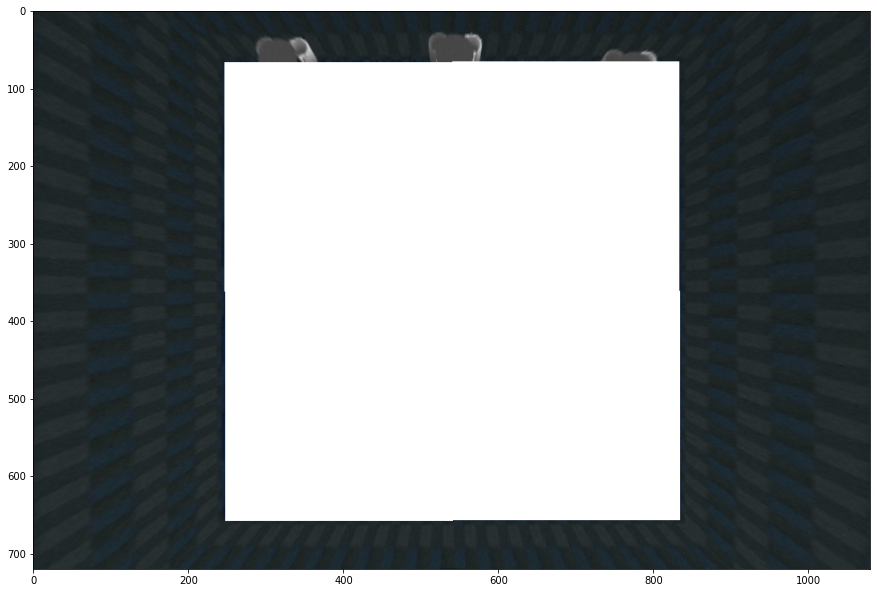

In [152]:


mask_w = np.zeros(temp_image.shape,dtype=np.uint8) #create blank image
poly = np.int64(np.array(first_mask))    #create polygon
cv2.fillConvexPoly(mask_w,poly,(255,255,255))  # fill polygon in image

# mask_w = cv2.bitwise_not(mask_w)   # invert colors with this line
other_im = im.copy()  #temporary copy 2
# mask_two = cv2.bitwise_and(other_im,mask_w)  #combine the images
mask_two = cv2.bitwise_or(other_im,mask_w)  #combine the images***********
plt.figure(figsize=(15,15))
plt.imshow(mask_two)


/home/kiki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


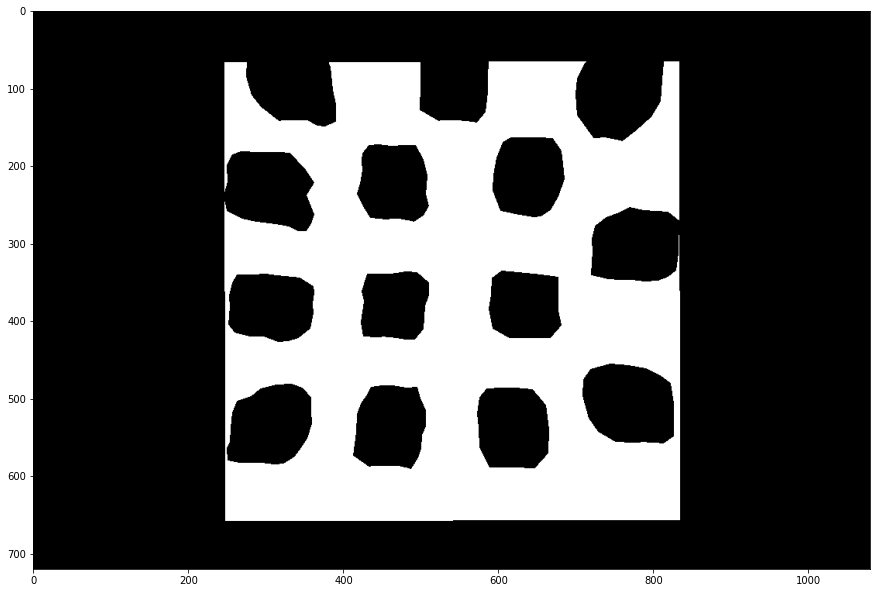

In [153]:
main_second_mask = np.array(main_second_mask)
mask_b = np.zeros(temp_image.shape,dtype=np.uint8)
# print(main_second_mask.shape)

for pts in main_second_mask:     #go through all the set of points to create individual masks
    poly = np.int32(np.array(pts))
    cv2.fillConvexPoly(mask_b,poly,(255,255,255))
    other_im = im.copy()
    mask_one = cv2.bitwise_and(other_im,mask_b)

    
mask_b = cv2.bitwise_not(mask_b)    
# final_image = cv2.bitwise_or(mask_two,mask_one)
final_image = cv2.bitwise_and(mask_two,mask_one)    #   *******
# final_mask = cv2.bitwise_or(mask_w,mask_b)
final_mask = cv2.bitwise_and(mask_w,mask_b)       # *******
final_image = cv2.cvtColor(final_image,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,15))
plt.imshow(final_mask)

In [154]:
destination_path = "segmented_imgs/"+cam_name+".png"
cv2.imwrite(destination_path,final_mask)   #save image mask

True

In [ ]:
# np_savename = cam_name + ".npy"
# with open(np_savename, 'wb') as f:
#     np.save(f, np.array([1, 2]))